# Support Vector Regression (SVR)

## Importing the libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


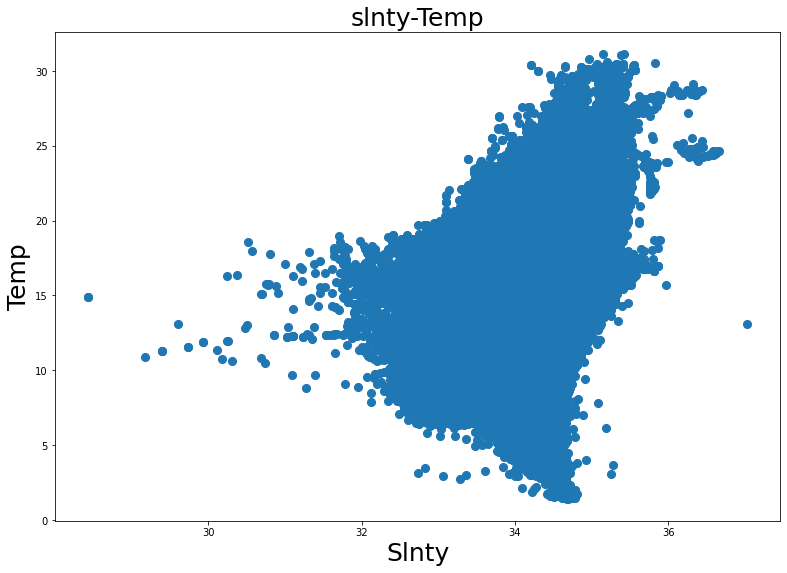

In [2]:
dataset = pd.read_csv('bottle.csv')
from matplotlib import pyplot as plt
Data=dataset[['Salnty', 'T_degC']]
import seaborn as sns
plt.figure(figsize=(13, 9))
plt.scatter(Data["Salnty"], Data["T_degC"],s=65)
plt.xlabel('Slnty',fontsize=25)
plt.ylabel('Temp',fontsize=25)
plt.title('slnty-Temp',fontsize=25)
plt.show()
dataset = dataset[:][:500]
X = np.array(dataset['Salnty']).reshape(-1,1)
y = np.array(dataset['T_degC']).reshape(-1,1)

## Dealing with missing values

In [0]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X = imputer.transform(X)
imputery = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputery.fit(y)
y= imputery.transform(y)

## Splitting data in train and Test sets

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc_y = StandardScaler()
X_train = sc.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

## Training the SVR model on the whole dataset

In [6]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [0]:
y_pred = sc_y.inverse_transform(regressor.predict(sc.fit_transform(X_test)))

## Visualising the SVR results

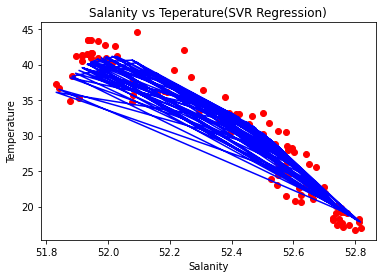

In [8]:
plt.scatter(sc.inverse_transform(X_test),sc_y.inverse_transform(y_test), color='red')
plt.plot(sc.inverse_transform(X_test),sc_y.inverse_transform(y_pred), color = 'blue')
plt.title("Salanity vs Teperature(SVR Regression)")
plt.xlabel("Salanity")
plt.ylabel('Temperature')
plt.show()

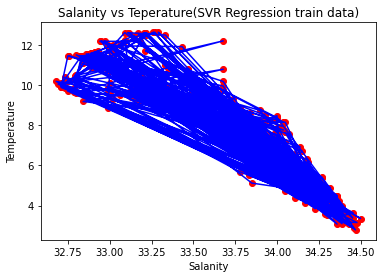

In [10]:
plt.scatter(sc.inverse_transform(X_train),sc_y.inverse_transform(y_train), color='red')
plt.plot(sc.inverse_transform(X_train),sc_y.inverse_transform(y_train), color = 'blue')
plt.title("Salanity vs Teperature(SVR Regression train data)")
plt.xlabel("Salanity")
plt.ylabel('Temperature')
plt.show()

## Model Evaluation

In [9]:
from sklearn.metrics import mean_squared_error,r2_score
rmse = np.sqrt(mean_squared_error(sc_y.inverse_transform(y_test),sc_y.inverse_transform(y_pred)))
r2 = r2_score(sc_y.inverse_transform(y_test),sc_y.inverse_transform(y_pred))
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

RMSE Score for Test set: 2.4
R2 Score for Test set: 0.92


## Visualising the SVR results (for higher resolution and smoother curve)